# Leaf Classification

In that project, I will try to classify different kinds of leaves. This looks like a image classification problem. But it isn't.

<p style="font-size:20px;">Explonations from <a href="https://www.kaggle.com/competitions/leaf-classification">Kaggle</a></p><br>
<a style="font-size:15px" href="www.kaggle.com/competitions/leaf-classification/overview/description">Description</a><br><br>
There are estimated to be nearly half a million species of plant in the world. Classification of species has been historically problematic and often results in duplicate identifications.

The objective of this playground competition is to use binary leaf images and extracted features, including shape, margin & texture, to accurately identify 99 species of plants. Leaves, due to their volume, prevalence, and unique characteristics, are an effective means of differentiating plant species. They also provide a fun introduction to applying techniques that involve image-based features.

As a first step, try building a classifier that uses the provided pre-extracted features. Next, try creating a set of your own features. Finally, examine the errors you're making and see what you can do to improve.

<a style="font-size: 18px" href="https://www.kaggle.com/competitions/leaf-classification/data">Data</a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leaf-classification/train.csv.zip
/kaggle/input/leaf-classification/sample_submission.csv.zip
/kaggle/input/leaf-classification/images.zip
/kaggle/input/leaf-classification/test.csv.zip


In [2]:
import zipfile
import os
labels=["train","ss","images","test"]
paths=["/kaggle/input/leaf-classification/train.csv.zip","/kaggle/input/leaf-classification/sample_submission.csv.zip","/kaggle/input/leaf-classification/images.zip","/kaggle/input/leaf-classification/test.csv.zip"]
for f, n in zip(paths, labels):
    with zipfile.ZipFile(f) as zip_ref:
        zip_ref.extractall(n) 

In [3]:
test=pd.read_csv("/kaggle/working/test/test.csv")
train=pd.read_csv("/kaggle/working/train/train.csv")
ss=pd.read_csv("/kaggle/working/ss/sample_submission.csv")

In [4]:
test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [5]:
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [6]:
ss.head()

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
1,7,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
2,9,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
3,12,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
4,13,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101


<Axes: >

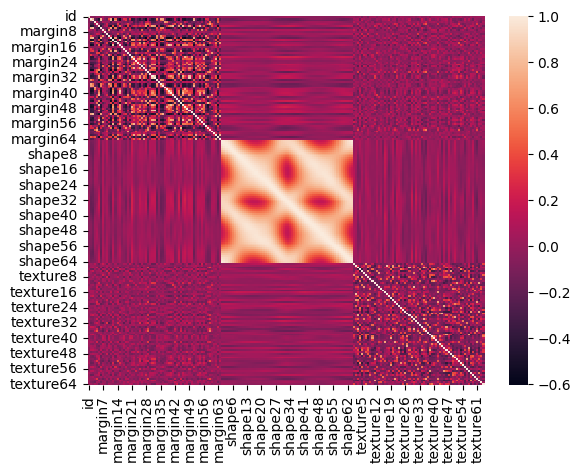

In [7]:
import seaborn as sns
sns.heatmap(train.corr(numeric_only=True))

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X=train.drop(["id","species"],axis=1)
y=train["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9571865443425076


In [10]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)
y_pred = clf2.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.11314984709480122


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X=train.drop(["id","species"],axis=1)
y=train["species"]
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X, y)

RandomForestClassifier()

In [12]:
feature_importance = clf.feature_importances_
columns=X.columns
feature_importance_sorting = sorted(zip(columns, feature_importance), key=lambda x: x[1], reverse=True)
for f, i in feature_importance_sorting:
    print(f"{f}: {i}")

margin48: 0.010078279178553579
margin6: 0.009877894925676289
margin50: 0.00878169643557268
texture49: 0.008762587414613438
texture9: 0.008593194904785741
shape17: 0.008502330383155048
shape18: 0.008330370202096303
margin59: 0.00830940374818276
margin13: 0.008174890245457603
texture6: 0.00816731694971804
shape15: 0.008116289879051065
texture13: 0.007858578907669911
margin3: 0.007765954087432193
margin43: 0.0076006505059070485
texture8: 0.007574383717557249
shape50: 0.007568905697484534
margin41: 0.007470900425227086
shape16: 0.007406666617307658
shape1: 0.007341882837517255
shape49: 0.0072801236524872946
margin45: 0.00718119344293203
shape48: 0.007149089773519103
shape32: 0.007128563501029654
margin39: 0.007125672138337207
margin21: 0.006997062887402274
texture59: 0.006992588114291457
texture30: 0.006901165361755657
margin55: 0.006804421029941213
texture14: 0.006768879083693301
texture23: 0.006711870717120989
margin22: 0.006693570147500276
texture2: 0.006649610318291308
margin4: 0.00658

In [13]:
for f, i in feature_importance_sorting:
    if i < 0.0058:
        train.drop(f, axis=1, inplace=True)
        test.drop(f, axis=1, inplace=True)
    else:
        continue

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train["species"] = encoder.fit_transform(train["species"])
train.head()

,id,species,margin1,margin2,margin3,margin4,margin6,margin13,margin14,margin15,...,texture20,texture23,texture29,texture30,texture31,texture34,texture38,texture42,texture49,texture59
0,1,3,0.007812,0.023438,0.023438,0.003906,0.009766,0.066406,0.000000,0.029297,...,0.022461,0.018555,0.037109,0.012695,0.028320,0.026367,0.016602,0.000977,0.004883,0.035156
1,2,49,0.005859,0.000000,0.031250,0.015625,0.001953,0.023438,0.000000,0.033203,...,0.006836,0.026367,0.027344,0.023438,0.062500,0.000000,0.003906,0.000000,0.035156,0.023438
2,3,65,0.005859,0.009766,0.019531,0.007812,0.005859,0.021484,0.001953,0.025391,...,0.027344,0.070312,0.035156,0.015625,0.027344,0.008789,0.011719,0.000000,0.010742,0.007812
3,5,94,0.000000,0.003906,0.023438,0.005859,0.019531,0.001953,0.003906,0.035156,...,0.012695,0.002930,0.017578,0.000977,0.016602,0.000977,0.001953,0.000000,0.006836,0.020508
4,6,84,0.005859,0.003906,0.048828,0.009766,0.015625,0.041016,0.011719,0.041016,...,0.008789,0.036133,0.005859,0.000000,0.003906,0.110350,0.087891,0.000000,0.000000,0.000000


In [15]:
x=train.drop(["id","species"],axis=1)
y=train["species"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from keras.models import Sequential
from keras.layers import Dense

2024-06-08 07:58:36.961586: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-08 07:58:36.961647: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-08 07:58:36.963334: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
model=Sequential()
model.add(Dense(64, activation="relu", input_dim=x_train.shape[1]))
model.add(Dense(32, activation="relu"))
model.add(Dense(99, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 99)             │         3,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,059 (35.39 KB)

 Trainable params: 9,059 (35.39 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(x_train, y_train, epochs=500, batch_size=32,validation_data=(x_test, y_test))

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0121 - loss: 4.5939 - val_accuracy: 0.0101 - val_loss: 4.5931
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0305 - loss: 4.5850 - val_accuracy: 0.0152 - val_loss: 4.5877
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0316 - loss: 4.5718 - val_accuracy: 0.0202 - val_loss: 4.5770
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0406 - loss: 4.5497 - val_accuracy: 0.0253 - val_loss: 4.5526
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0463 - loss: 4.5041 - val_accuracy: 0.0253 - val_loss: 4.5073
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0758 - loss: 4.4228 - val_accuracy: 0.0354 - val_loss: 4.4274
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0621 - loss: 4.2950 - val_accuracy: 0.0354 - val_loss: 4.3252
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0707 - loss: 4.1319 - val_accuracy: 0.0303 - 

In [19]:
ids = test["id"]
test.drop("id", axis=1, inplace=True)
probas = model.predict(test)
proba_df = pd.DataFrame(probas, columns=encoder.classes_)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [20]:
proba_df

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,1.143131e-13,9.321886e-25,6.468405e-15,1.886128e-05,0.000000e+00,1.872880e-30,1.024108e-20,0.000000e+00,0.000000e+00,2.194822e-21,...,0.000000e+00,4.294375e-14,0.000000e+00,9.760826e-34,2.697272e-14,2.197359e-22,0.000000e+00,9.199844e-11,9.994518e-32,2.625454e-11
1,6.015453e-19,8.929085e-25,3.013574e-13,1.394818e-13,0.000000e+00,9.199119e-23,4.924863e-12,0.000000e+00,0.000000e+00,1.046830e-17,...,7.712026e-38,1.753292e-24,3.200687e-34,1.228289e-24,6.689137e-16,2.031869e-17,0.000000e+00,1.705370e-15,4.349484e-31,1.370050e-11
2,8.329576e-19,9.854196e-01,8.278751e-30,2.337752e-20,2.355391e-16,0.000000e+00,1.586644e-34,8.539594e-22,7.158749e-07,2.022694e-26,...,1.141448e-27,0.000000e+00,2.552918e-27,4.928135e-25,8.014956e-11,2.470191e-12,1.354041e-06,0.000000e+00,7.296390e-30,4.092780e-11
3,5.517320e-11,1.108143e-04,4.671045e-33,4.841277e-21,4.270375e-36,0.000000e+00,1.078597e-35,7.577323e-16,4.009998e-06,5.768855e-13,...,7.335422e-33,0.000000e+00,1.136747e-18,2.885288e-33,4.155430e-08,4.264858e-09,1.072028e-15,0.000000e+00,0.000000e+00,5.311766e-06
4,1.644288e-16,2.161782e-14,2.228886e-33,1.278381e-24,1.125142e-16,0.000000e+00,6.503799e-33,6.233782e-24,1.443734e-11,5.936945e-21,...,1.884898e-16,0.000000e+00,1.149283e-15,6.017638e-21,1.803134e-08,8.006817e-14,3.726105e-05,0.000000e+00,2.346955e-25,4.340757e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1.522898e-16,9.992104e-01,7.836859e-29,5.983647e-18,3.140205e-20,0.000000e+00,9.125324e-34,1.213073e-23,8.001000e-08,3.828945e-24,...,1.678164e-29,0.000000e+00,1.172364e-25,3.146251e-26,3.029018e-10,4.430842e-12,6.949162e-08,0.000000e+00,3.110042e-29,2.623349e-09
590,2.665322e-10,6.938632e-13,5.205266e-32,2.295631e-14,0.000000e+00,0.000000e+00,0.000000e+00,5.453624e-14,2.591210e-09,3.656934e-23,...,8.240075e-33,0.000000e+00,4.118346e-11,7.950780e-32,2.684079e-07,1.384255e-06,2.859352e-18,3.656376e-38,4.881349e-36,7.991602e-06
591,2.809883e-13,2.747521e-36,2.732913e-17,9.997095e-13,0.000000e+00,6.907461e-33,1.530788e-23,0.000000e+00,0.000000e+00,3.891234e-19,...,0.000000e+00,1.421569e-25,2.562141e-38,8.262115e-38,1.735388e-19,3.791908e-28,0.000000e+00,3.868272e-15,2.378341e-38,1.310112e-16
592,1.131872e-26,4.903481e-26,2.416943e-05,8.328603e-12,7.033703e-25,1.757274e-13,1.659413e-08,3.891970e-27,1.262889e-31,1.702475e-35,...,4.559797e-13,3.383453e-12,4.928623e-36,2.284870e-05,1.390256e-13,1.444855e-13,6.015970e-32,3.325886e-09,1.757603e-13,6.878025e-19


In [21]:
proba_df["id"]=ids

In [22]:
proba_df.to_csv("submission.csv", index=False)

In [23]:
model.save("model.h5")

In this project, I attempted to classify different types of leaves using machine learning. However, the initial performance metrics were not very encouraging, indicating that the model might not be effectively capturing the nuances required for accurate classification. To better understand my model’s performance in real-life scenarios, I plan to develop a Streamlit application. This interactive app will allow for a more detailed exploration of the model’s strengths and weaknesses by visualizing its predictions and metrics. Through this approach, I aim to gain deeper insights into the model’s behavior, identify areas for improvement, and ultimately enhance its accuracy and robustness for practical applications.